# Visuals 2-4
## In Order:
### 1. Points Per Shot Heatmap
### 2. Source of Points
### 3. Threes Shot By Centers

In [1]:
from nba_api.stats.endpoints import shotchartdetail
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import seaborn as sns
import json
import requests

## Visual 1
### For each year, calculate points per shot for each range of defender distance, loop through all shot distances to collect list

In [9]:
# def def_dist(range_def):
def def_range(range_def):
    url_base = "https://stats.nba.com/stats/leaguedashplayerptshot?" 
    headers = {"Accept": "application/json, text/plain, */*",
    "Accept-Encoding": "gzip, deflate, br",
    "Accept-Language": "en-US,en;q=0.9",
    "Connection": "keep-alive",
    "DNT": "1",
    "Host": "stats.nba.com",
    "If-Modified-Since": "Fri, 29 Apr 2022 22:47:00 GMT",
    "Origin": "https://www.nba.com",
    "Referer": "https://www.nba.com/",
    "sec-ch-ua": '"Not A;Brand";v="99", "Chromium";v="100", "Google Chrome";v="100"',
    "sec-ch-ua-mobile": "?0",
    "sec-ch-ua-platform": "Windows",
    "Sec-Fetch-Dest": "empty",
    "Sec-Fetch-Mode": "cors",
    "Sec-Fetch-Site": "same-site",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36",
    "x-nba-stats-origin": "stats",
    "x-nba-stats-token": "true"}
    parameters = {"CloseDefDistRange": range_def,
    "College": '',
    "Conference": '',
    "Country": '',
    "DateFrom": '',
    "DateTo": '',
    "Division" :'',
    "DraftPick" :'',
    "DraftYear" :'',
    "DribbleRange" :'',
    "GameSegment": '',
    "GeneralRange" :'',
    "Height": '',
    "LastNGames": 0,
    "LeagueID": "00",
    "Location" :'',
    "Month": 0,
    "OpponentTeamID": 0,
    "Outcome": '',
    "PORound" :0,
    "PerMode" :"Totals",
    "Period": 0,
    "PlayerExperience": '',
    "PlayerPosition" :'',
    "Season" :"2020-21",
    "SeasonSegment" :'',
    "SeasonType": "Regular Season",
    "ShotClockRange" :'',
    "ShotDistRange": '',
    "StarterBench": '',
    "TeamID": 0,
    "TouchTimeRange": '',
    "VsConference": '',
    "VsDivision": '',
    "Weight": '',}
    response = requests.get(url_base,  params=parameters,headers=headers)
    content = json.loads(response.content)
    # time.sleep(120) # Pause 2 Minutes
    shot_data = content
    # Get the relevant data from our dictionary
    relevant_data = shot_data['resultSets'][0]
    # Get the headers and row data
    headers = relevant_data['headers']
    rows = relevant_data['rowSet']
    # Create pandas DataFrame
    three_data = pd.DataFrame(rows)
    three_data.columns = headers
    shot_distances = three_data["Shot Distance"].unique()
    output_list = []
    # Calculate points per shot
    for dist in shot_distances:
        fg2m = three_data[three_data["Shot Distance"] == dist]["FG2M"].sum() * 2
        fg2a = three_data[three_data["Shot Distance"] == dist]["FG2A"].sum()
        if fg2a == 0:
            pps_2 = fg2m / fg2a
            output_list.append([dist,pps_2])
        else:
            fg3m = three_data[three_data["Shot Distance"] == dist]["FG3M"].sum() * 3
            pps_3 = fg3m / three_data[three_data["Shot Distance"] == dist]["FG3A"].sum()
            output_list.append([dist,pps_3])
    return output_list
        
        
        
    
    

In [ ]:
defender_dists= ["0-2 Feet - Very Tight","2-4 Feet - Tight","4-6 Feet - Open","6+ Feet - Wide Open"]

### Make dataframe of all distances and defender ranges

In [ ]:
pps = pd.DataFrame(columns = ["Shot distance","0-2 Feet - Very Tight","2-4 Feet - Tight","4-6 Feet - Open","6+ Feet - Wide Open"])
for dist in defender_dists:
    lst = def_range(dist)
    pps["Shot distance"].loc(lst[:,0])
    pps[dist].loc(lst[:,1])

Text(0.5, 1.0, 'Points Per Shot In Relation To \n Shot Distance and Nearest Defender \n during the 2020-2021 NBA Season')

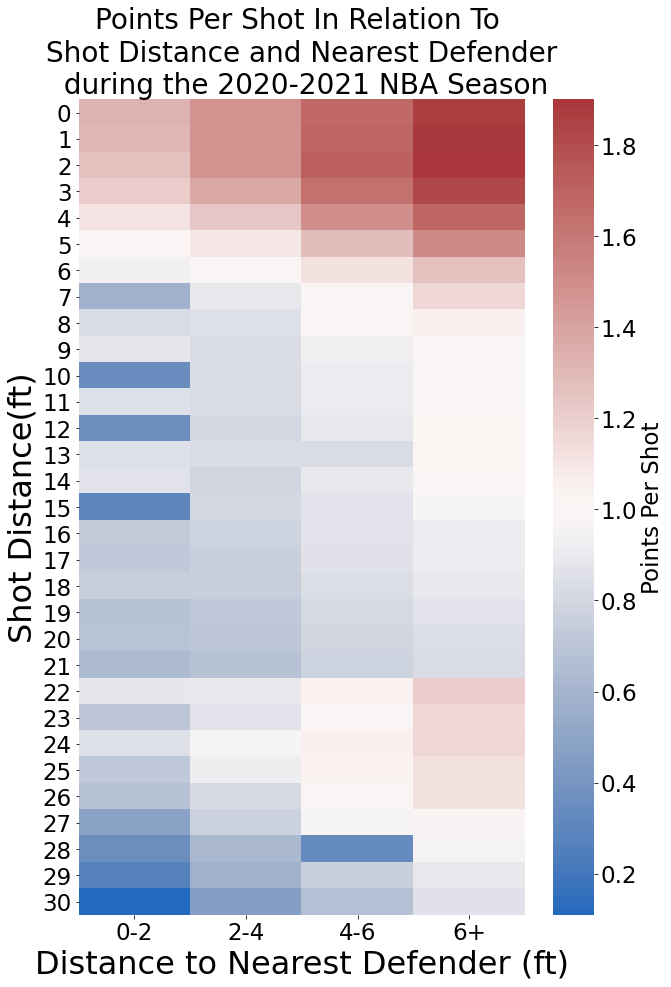

In [133]:
fig = plt.figure(figsize = (10,15))
x_axis_labels = ["0-2","2-4","4-6","6+"]
s = sns.heatmap(pps,cmap = "vlag",xticklabels = x_axis_labels,cbar_kws={'label': 'Points Per Shot'})
s.s    column_names = lst.pop(0)
et_xlabel("Distance to Nearest Defender (ft)",fontsize = 32)
s.set_ylabel("Shot Distance(ft)",fontsize = 32)
s.set_title("Points Per Shot In Relation To \n Shot Distance and Nearest Defender \n during the 2020-2021 NBA Season",fontsize = 28)

## Visual 2
### For each year, get total 2pm, 3pm, and Ftm

In [ ]:
def source_pts(year):
    url_base = 'https://stats.nba.com/stats/shotchartdetail'

    headers = {
            'Host': 'stats.nba.com',
            'Connection': 'keep-alive',
            'Accept': 'application/json, text/plain, */*',
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
            'Referer': 'https://stats.nba.com/',
            "x-nba-stats-origin": "stats",
            "x-nba-stats-token": "true",
            'Accept-Encoding': 'gzip, deflate, br',
            'Accept-Language': 'en-US,en;q=0.9',
        }

    parameters = {
        'ContextMeasure': 'FG3M', # 3 Pointers Made
        'LastNGames': 0,
        'LeagueID': '00',
        'Month': 0,
        'OpponentTeamID': 0,
        'Period': 0,
        'PlayerID': 0,
        'SeasonType': 'Regular Season',
        'TeamID': 0,
        'VsDivision': '',
        'VsConference': '',
        'SeasonSegment': '',
        'Season': year,
        'RookieYear': '',
        'PlayerPosition': '', # All positions
        'Outcome': '',
        'Location': '',
        'GameSegment': '',
        'GameId': '',
        'DateTo': '',
        'DateFrom': ''
    }


    response = requests.get(url_base, params=parameters, headers=headers)
    content = json.loads(response.content)
    time.sleep(120) # Pause 2 Minutes
    shot_data = content
    # Get the relevant data from our dictionary
    relevant_data = shot_data['resultSets'][0]
    # Get the headers and row data
    headers = relevant_data['headers']
    rows = relevant_data['rowSet']
    # Create pandas DataFrame
    three_data = pd.DataFrame(rows)
    three_data.columns = headers
    
    sum_3pm = len(three_data.index) # Sum all 3 pointers made that year
    
    
    # Get 2 Pointers Made
    
    url_base = 'https://stats.nba.com/stats/shotchartdetail'

    headers = {
            'Host': 'stats.nba.com',
            'Connection': 'keep-alive',
            'Accept': 'application/json, text/plain, */*',
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
            'Referer': 'https://stats.nba.com/',
            "x-nba-stats-origin": "stats",
            "x-nba-stats-token": "true",
            'Accept-Encoding': 'gzip, deflate, br',
            'Accept-Language': 'en-US,en;q=0.9',
        }

    parameters = {
        'ContextMeasure': 'FGM', # All Shots Made
        'LastNGames': 0,
        'LeagueID': '00',
        'Month': 0,
        'OpponentTeamID': 0,
        'Period': 0,
        'PlayerID': 0,
        'SeasonType': 'Regular Season',
        'TeamID': 0,
        'VsDivision': '',
        'VsConference': '',
        'SeasonSegment': '',
        'Season': year,
        'RookieYear': '',
        'PlayerPosition': '', 
        'Outcome': '',
        'Location': '',
        'GameSegment': '',
        'GameId': '',
        'DateTo': '',
        'DateFrom': ''
    }


    response = requests.get(url_base, params=parameters, headers=headers)
    content = json.loads(response.content)
    shot_data = content

    # Get the relevant data from our dictionary
    relevant_data = shot_data['resultSets'][0]
    # Get the headers and row data
    headers = relevant_data['headers']
    rows = relevant_data['rowSet']
    # Create pandas DataFrame
    allfg_data = pd.DataFrame(rows)
    allfg_data.columns = headers
    
    # Since all field goals attempted are either 3 point or 2 point attempts, use a left join to only include 2 pointers
    two_data = pd.merge(allfg_data,three_data, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
    sum_2pm = len(two_data.index)
    
    # Get all Free Throws Made
    
    url_base = 'https://stats.nba.com/stats/shotchartdetail'

    headers = {
            'Host': 'stats.nba.com',
            'Connection': 'keep-alive',
            'Accept': 'application/json, text/plain, */*',
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
            'Referer': 'https://stats.nba.com/',
            "x-nba-stats-origin": "stats",
            "x-nba-stats-token": "true",
            'Accept-Encoding': 'gzip, deflate, br',
            'Accept-Language': 'en-US,en;q=0.9',
        }

    parameters = {
        'ContextMeasure': 'FTM', # All Free Throws Made
        'LastNGames': 0,
        'LeagueID': '00',
        'Month': 0,
        'OpponentTeamID': 0,
        'Period': 0,
        'PlayerID': 0,
        'SeasonType': 'Regular Season',
        'TeamID': 0,
        'VsDivision': '',
        'VsConference': '',
        'SeasonSegment': '',
        'Season': year,
        'RookieYear': '',
        'PlayerPosition': '', 
        'Outcome': '',
        'Location': '',
        'GameSegment': '',
        'GameId': '',
        'DateTo': '',
        'DateFrom': ''
    }


    response = requests.get(url_base, params=parameters, headers=headers)
    content = json.loads(response.content)
    shot_data = content

    # Get the relevant data from our dictionary
    relevant_data = shot_data['resultSets'][0]
    # Get the headers and row data
    headers = relevant_data['headers']
    rows = relevant_data['rowSet']
    # Create pandas DataFrame
    ftm = pd.DataFrame(rows)
    ftm.columns = headers
    sum_ftm = len(ftm.index)
    
    # Convert to point value
    sum_3pm *= 3
    sum_2pm *= 2
    sum_ftm += 1 # 1 point per free throw
    
    pt_sum = sum_3pm + sum_2pm + sum_ftm
    
    # Convert to ratio
    pct3 = sum_3pm/pt_sum
    pct2 = sum_2pm/pt_sum
    pct_ft = sum_ftm / pt_sum
    
    return pct3,pct2,pct_ft

### Loop through seasons 1980 - present

In [10]:
seasons = ["1980-81","1981-82","1982-83","1983-1984","1984-85","1985-86",
           "1986-87","1987-88","1988-89","1989-90","1990-91","1991-92","1992-93","1993-94",
           "1994-95","1995-96","1996-97","1997-98","1998-99","1999-00","2000-01","2001-02","2002-03",
           "2003-04","2004-05","2005-06","2006-07","2007-08","2008-09","2009-10","2010-11","2011-12","2012-13",
           "2013-14","2014-15","2015-16","2016-17","2017-18","2018-19","2019-20","2020-21"]

In [ ]:
pts = [["Year","2 Point Shot","3 Point Shot","Free Throw"]]
for season in seasons:
    pct3,pct2,pct_ft = source_pts(season)
    pts.append([season,pct2,pct3,pct_ft])
column_names = pts.pop(0)
fgm3 = pd.DataFrame(pts, columns=column_names)

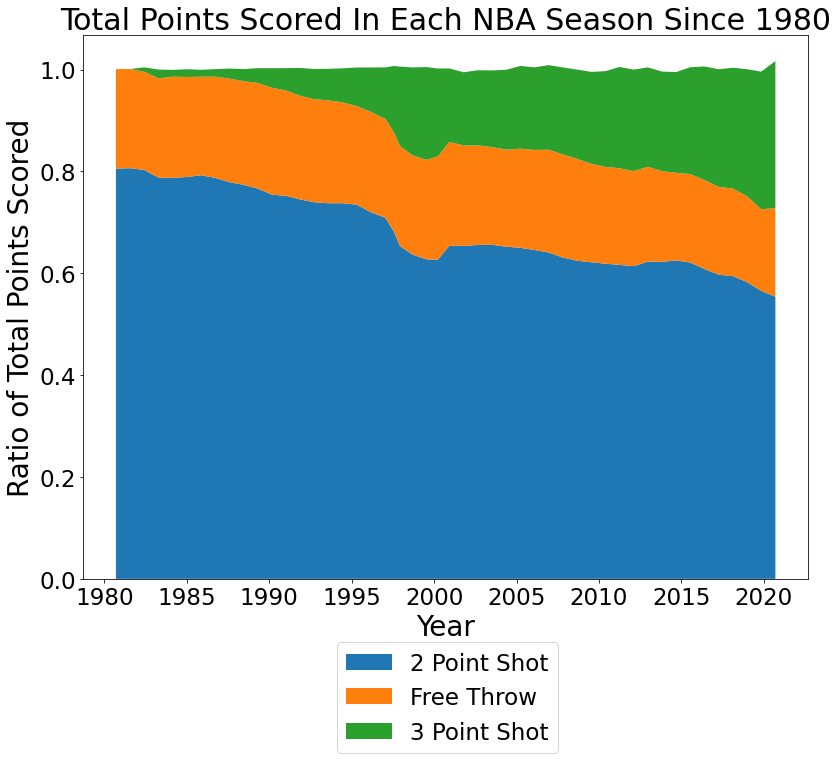

In [123]:
fig = plt.figure(figsize = (13,10))
plt.stackplot(fgm3["Year"],fgm3["2 Point Shot"], fgm3["Free Throw"],fgm3["3 Point Shot"], labels=["2 Point Shot","Free Throw","3 Point Shot"])
plt.legend(loc = (0.35,-0.32))
plt.xlabel("Year",fontsize = 28)
plt.ylabel("Ratio of Total Points Scored",fontsize = 28)
plt.title("Total Points Scored In Each NBA Season Since 1980",fontsize = 30)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 23}

plt.rc('font', **font)

## Visual 3
### For each year, get three pointers made and attempted by centers

In [ ]:
def year_c3pm(year):
    url_base = 'https://stats.nba.com/stats/shotchartdetail'

    headers = {
            'Host': 'stats.nba.com',
            'Connection': 'keep-alive',
            'Accept': 'application/json, text/plain, */*',
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
            'Referer': 'https://stats.nba.com/',
            "x-nba-stats-origin": "stats",
            "x-nba-stats-token": "true",
            'Accept-Encoding': 'gzip, deflate, br',
            'Accept-Language': 'en-US,en;q=0.9',
        }

    parameters = {
        'ContextMeasure': 'FG3A', # 3 Pointers attempted
        'LastNGames': 0,
        'LeagueID': '00',
        'Month': 0,
        'OpponentTeamID': 0,
        'Period': 0,
        'PlayerID': 0,
        'SeasonType': 'Regular Season',
        'TeamID': 0,
        'VsDivision': '',
        'VsConference': '',
        'SeasonSegment': '',
        'Season': year,
        'RookieYear': '',
        'PlayerPosition': 'C', # Centers Only
        'Outcome': '',
        'Location': '',
        'GameSegment': '',
        'GameId': '',
        'DateTo': '',
        'DateFrom': ''
    }


    response = requests.get(url_base, params=parameters, headers=headers)
    content = json.loads(response.content)
    time.sleep(120) # Pause 2 Minutes
    shot_data = content
#     shot_json = shotchartdetail.ShotChartDetail(
#             team_id = 0,
#             player_id = 0,
#             context_measure_simple = 'FG3A',
#             season_nullable = year,
#             season_type_all_star = 'Regular Season'
#             position = 'C')
    #shot_data = json.loads(shot_json.get_json())
    
    # Get the relevant data from our dictionary
    relevant_data = shot_data['resultSets'][0]
    # Get the headers and row data
    headers = relevant_data['headers']
    rows = relevant_data['rowSet']
    # Create pandas DataFrame
    curry_data = pd.DataFrame(rows)
    curry_data.columns = headers
    
    c3pa = len(curry_data.index) # Sum all center 3 pointers attempted that year
    
    # Get 3 Pointers Made
    
    url_base = 'https://stats.nba.com/stats/shotchartdetail'

    headers = {
            'Host': 'stats.nba.com',
            'Connection': 'keep-alive',
            'Accept': 'application/json, text/plain, */*',
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
            'Referer': 'https://stats.nba.com/',
            "x-nba-stats-origin": "stats",
            "x-nba-stats-token": "true",
            'Accept-Encoding': 'gzip, deflate, br',
            'Accept-Language': 'en-US,en;q=0.9',
        }

    parameters = {
        'ContextMeasure': 'FG3M', # 3 Pointers Made
        'LastNGames': 0,
        'LeagueID': '00',
        'Month': 0,
        'OpponentTeamID': 0,
        'Period': 0,
        'PlayerID': 0,
        'SeasonType': 'Regular Season',
        'TeamID': 0,
        'VsDivision': '',
        'VsConference': '',
        'SeasonSegment': '',
        'Season': year,
        'RookieYear': '',
        'PlayerPosition': 'C', # Centers Only
        'Outcome': '',
        'Location': '',
        'GameSegment': '',
        'GameId': '',
        'DateTo': '',
        'DateFrom': ''
    }


    response = requests.get(url_base, params=parameters, headers=headers)
    content = json.loads(response.content)
    shot_data = content
#     shot_json = shotchartdetail.ShotChartDetail(
#             team_id = 0,
#             player_id = 0,
#             context_measure_simple = 'FG3M',
#             season_nullable = year,
#             season_type_all_star = 'Regular Season'
#             position = 'C')
    #shot_data = json.loads(shot_json.get_json())
    
    # Get the relevant data from our dictionary
    relevant_data = shot_data['resultSets'][0]
    # Get the headers and row data
    headers = relevant_data['headers']
    rows = relevant_data['rowSet']
    # Create pandas DataFrame
    curry_data = pd.DataFrame(rows)
    curry_data.columns = headers
    
    c3pm = len(curry_data.index)
    
    return c3pa,c3pm

In [2]:
seasons = ['2010-11',
 '2011-12',
 '2012-13',
 '2013-14',
 '2014-15',
 '2015-16',
 '2016-17',
 '2017-18',
 '2018-19',
 '2019-20']

### Collect from all seasons and put into df

In [6]:
c3_list = [["3PA","3PM","Year"]]
for season in seasons:
    c3pa, c3pm = year_c3pm(season)
    c3_list.append([c3pa,c3pm,season[0:4]])
column_names = c3_list.pop(0)
c3pm = pd.DataFrame(c3_list, columns=column_names)
c3pm

,3PA,3PM,Year
0,1488,490,2010
1,622,188,2011
2,471,113,2012
3,490,132,2013
4,1319,452,2014
5,1036,358,2015
6,1677,565,2016
7,4691,1677,2017
8,4936,1752,2018
9,5199,1733,2019


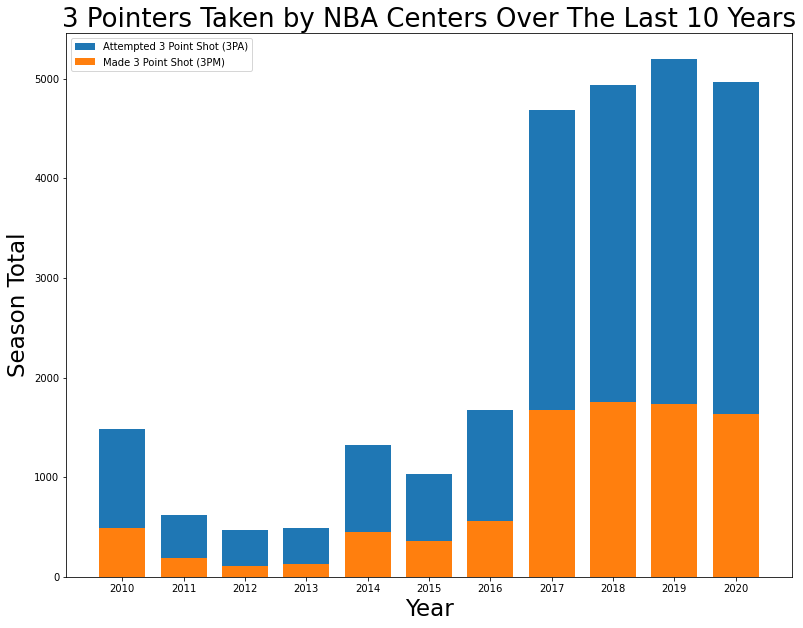

In [7]:

width = 0.75     # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize = (13,10))

ax.bar(c3pm["Year"], c3pm["3PA"], width, label='Attempted 3 Point Shot (3PA)')
ax.bar(c3pm["Year"], c3pm["3PM"], width, label='Made 3 Point Shot (3PM)')

ax.set_ylabel('Season Total',fontsize = 23)
ax.set_xlabel('Year',fontsize = 23)
ax.set_title('3 Pointers Taken by NBA Centers Over The Last 10 Years',fontsize = 26)
ax.legend()
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)
plt.show()
